In [158]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torchvision import datasets, transforms
 

In [159]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [160]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [161]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


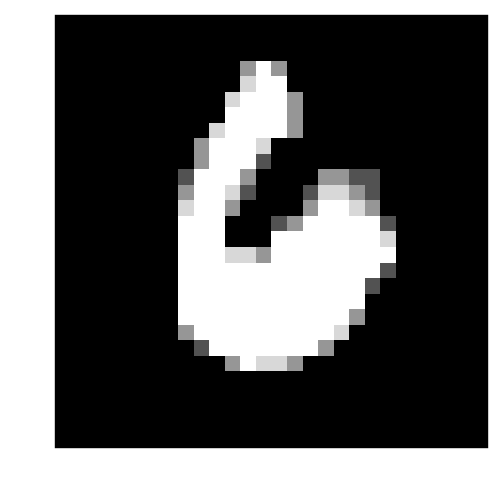

In [162]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [163]:
input_unit = 784
hidden_unit = 256
output_unit = 10
input_hidden_weights = torch.randn((784, 256))
hidden_out_weights = torch.randn((256, 10))

bias_input_hidden = torch.randn((1, 256))
bias_hidden_output = torch.randn((1, 10))


In [164]:
features = images.view(64,784)  

In [165]:
input_hidden_layer  = activation(torch.mm(features , input_hidden_weights)   + bias_input_hidden )
hidden_output_layer  = torch.mm(input_hidden_layer , hidden_out_weights)   + bias_hidden_output 

In [166]:
print(input_hidden_layer.shape)
print(input_hidden_layer)

torch.Size([64, 256])
tensor([[ 0.0000,  0.0000,  1.0000,  ...,  1.0000,  0.4960,  1.0000],
        [ 0.9919,  0.0000,  1.0000,  ...,  0.9915,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  ...,  1.0000,  0.0000,  1.0000],
        ...,
        [ 0.0000,  0.0000,  0.9999,  ...,  1.0000,  0.4503,  0.0319],
        [ 0.0031,  0.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
        [ 0.0000,  0.0000,  1.0000,  ...,  1.0000,  1.0000,  0.9999]])


In [167]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [168]:
y_hat = softmax(hidden_output_layer)
print(y_hat)
print(y_hat.shape)
print(y_hat.sum(dim=1))
print(y_hat.sum(dim=1).shape) #should have 1 row and 64 columns.

tensor([[ 4.0376e-09,  1.9867e-05,  1.2685e-09,  9.9944e-01,  5.3043e-06,
          5.3144e-04,  3.5588e-11,  7.8096e-10,  2.9048e-18,  4.3658e-08],
        [ 2.0195e-04,  7.1609e-01,  1.0537e-06,  2.8303e-01,  6.8240e-04,
          2.8682e-07,  1.0620e-09,  2.2209e-08,  2.6545e-17,  5.1047e-10],
        [ 9.0691e-11,  4.2472e-09,  6.2018e-10,  8.3387e-05,  3.0786e-04,
          9.9961e-01,  7.0284e-14,  4.8742e-12,  1.6411e-18,  5.1220e-07],
        [ 2.0104e-05,  2.0307e-04,  3.4585e-04,  9.9784e-01,  5.1858e-04,
          1.0754e-03,  3.0692e-09,  4.0518e-07,  7.3797e-17,  8.2197e-07],
        [ 1.9144e-11,  4.0474e-08,  4.8482e-10,  1.0000e+00,  1.8065e-11,
          2.4774e-09,  9.7012e-13,  1.4452e-11,  7.8666e-19,  2.0875e-12],
        [ 5.4839e-10,  7.1546e-01,  2.3566e-05,  2.5516e-01,  3.2623e-08,
          2.9353e-02,  8.1575e-08,  2.9190e-07,  1.3116e-15,  4.1057e-06],
        [ 6.4377e-03,  1.3238e-02,  3.1815e-02,  8.0240e-01,  2.5784e-07,
          1.4590e-01,  2.0798e-0